In [1]:
%load_ext autoreload
%autoreload 2

# Introduction
Insurance fraud is a significant issue, costing the industry over $40 billion annually and raising premiums for the average U.S. family by $400 to $700 per year. With over 7,000 companies collecting more than $1 trillion in premiums annually, the industry's size creates opportunities and incentives for fraudulent activities (FBI Insurance Fraud).  

Apart from the loss in insurance fraud, each fraud case can be committed by individuals or groups, involving both customers and agents. Common types include false claims and document forgery. For example, agents may commit fraud by forging documents or using unauthorized personal information for policy applications without the owner's consent.

While such fraud can often be detected through document screening and validation, the process is largely manual, posing challenges. The high volume of policy applications overwhelms the limited number of personnel responsible for document review, increasing the risk of missed forgeries.

To address this issue, I propose a Consent Detection Framework. This solution aims to reduce the risk of document forgery and streamline the process for those involved by leveraging automated tools for more efficient and accurate fraud detection.

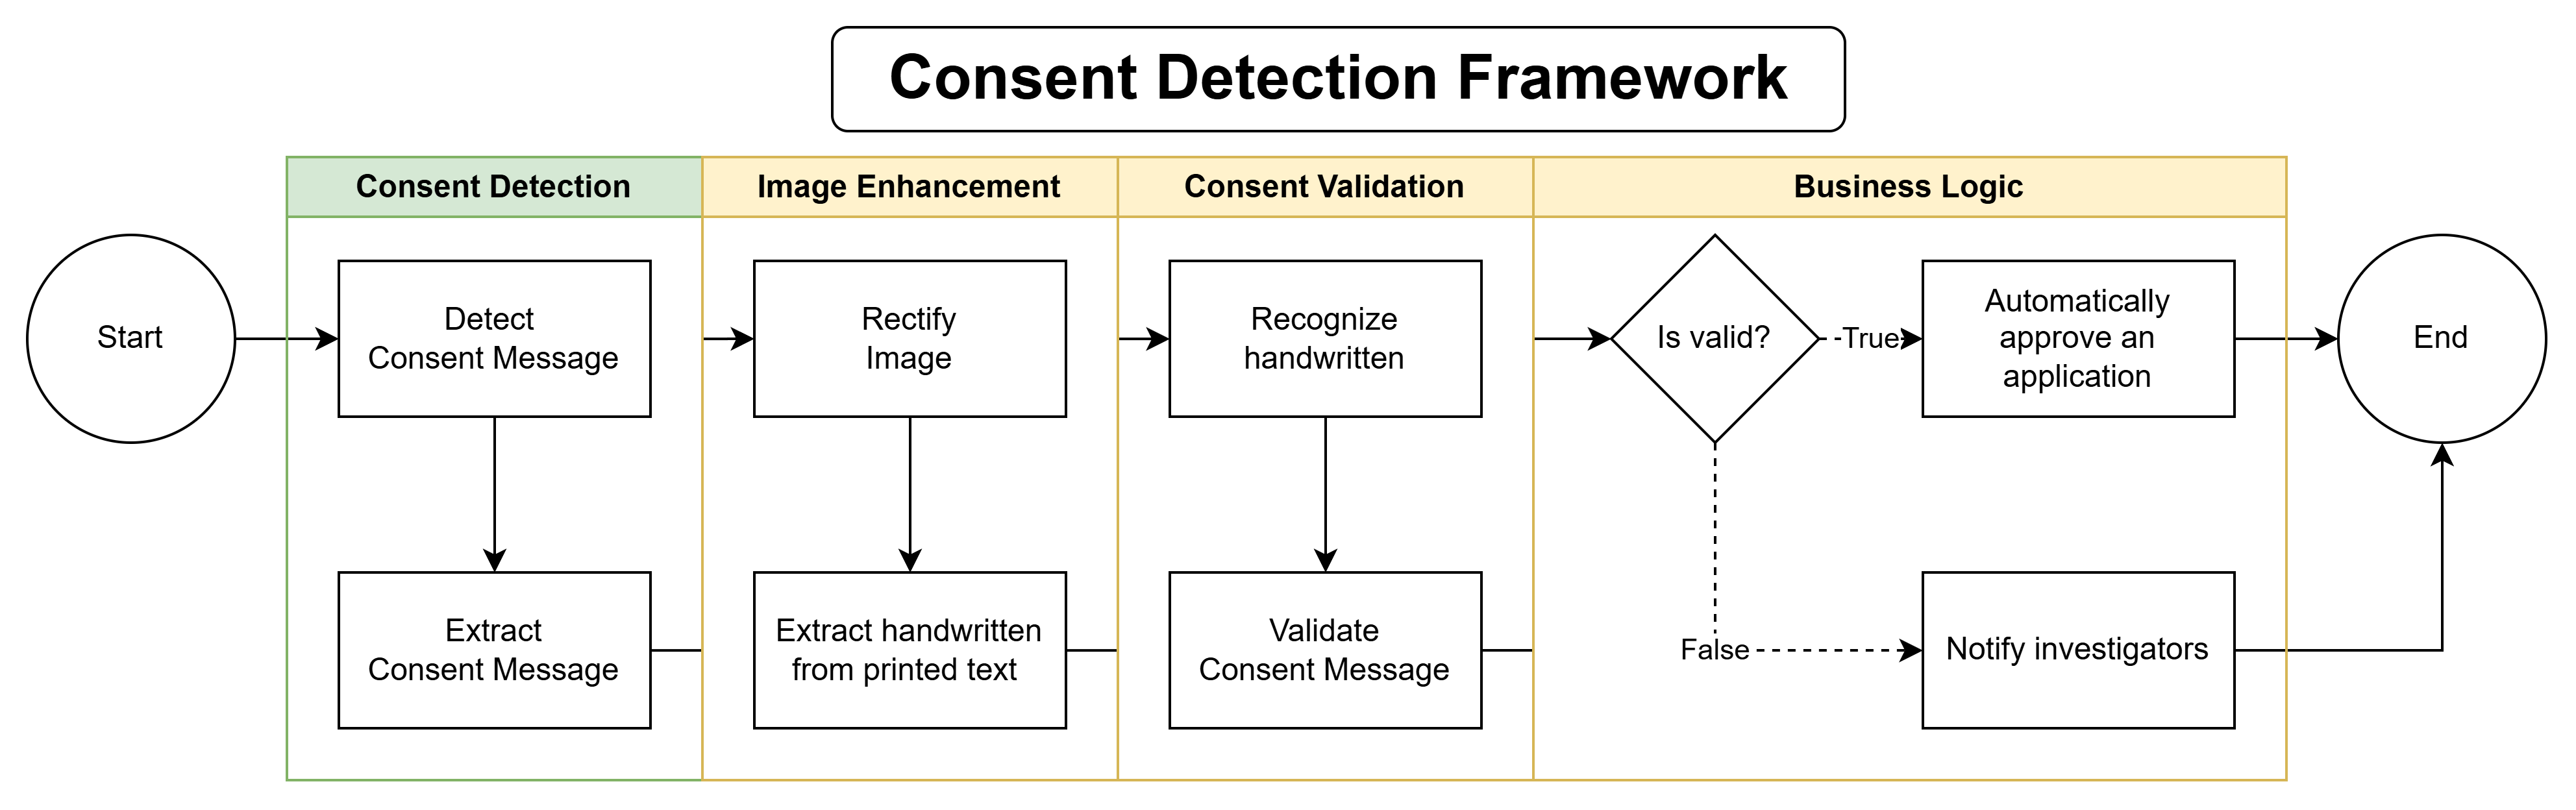


The Consent Detection Framework is a four-stage process designed to identify, validate, and route consent messages in policy documents efficiently:

**Consent Detection**: This stage identifies the location of the consent message within the document and extracts it for further processing.

**Image Enhancement**: The extracted consent message undergoes two key improvements:

- Alignment: Ensures the consent message is horizontally aligned.
- Background Separation: Removes any printed text from the background, isolating the pure consent message.  

**Consent Validation**: This stage performs two tasks:

- Conversion: Converts the consent message from an image into text.  
- Validation: Assigns a validity score to determine whether the consent message meets the required standards.  

**Business Logic**: Acting as a router, this stage directs policy applications to the appropriate next step based on predefined business rules, streamlining the overall workflow.

# Problem Statement 
Due to time constraints, **this project will initially focus on the Consent Detection stage.** This stage serves as the foundation for the entire framework, as subsequent stages cannot proceed without it.

Additionally, detecting consent messages is a specialized task for which no pretrained models currently exist. Therefore, the problem to address involves two key objectives:

1) Developing a custom object detection model to identify consent messages within documents.  
2) Using the detection results to extract the consent message text, enabling further processing in later stages.  

This focused approach establishes a solid starting point for building the full Consent Detection Framework.

# Data Exploration  

The dataset used in this project is a synthetic dataset designed to mimic real documents. **Real documents could not be used due to the sensitive information they contain, which would violate PDPA regulations.**

The synthetic dataset includes 216 images with the following characteristics:

**Templates**: Two background templates.  
**Consent Messages**: Eight unique base consent messages, each appearing in variations:  
- Orientation: Straight, tilted up, and tilted down.
- Offset: Leftmost, rightmost, and centered on the template.
- Resolution: Document images are 642 x 908 pixels.  

While the synthetic dataset effectively represents structured layouts, it lacks real-world imperfections such as scanning noise, grain, or uneven coloring, which may impact model generalization to real documents.

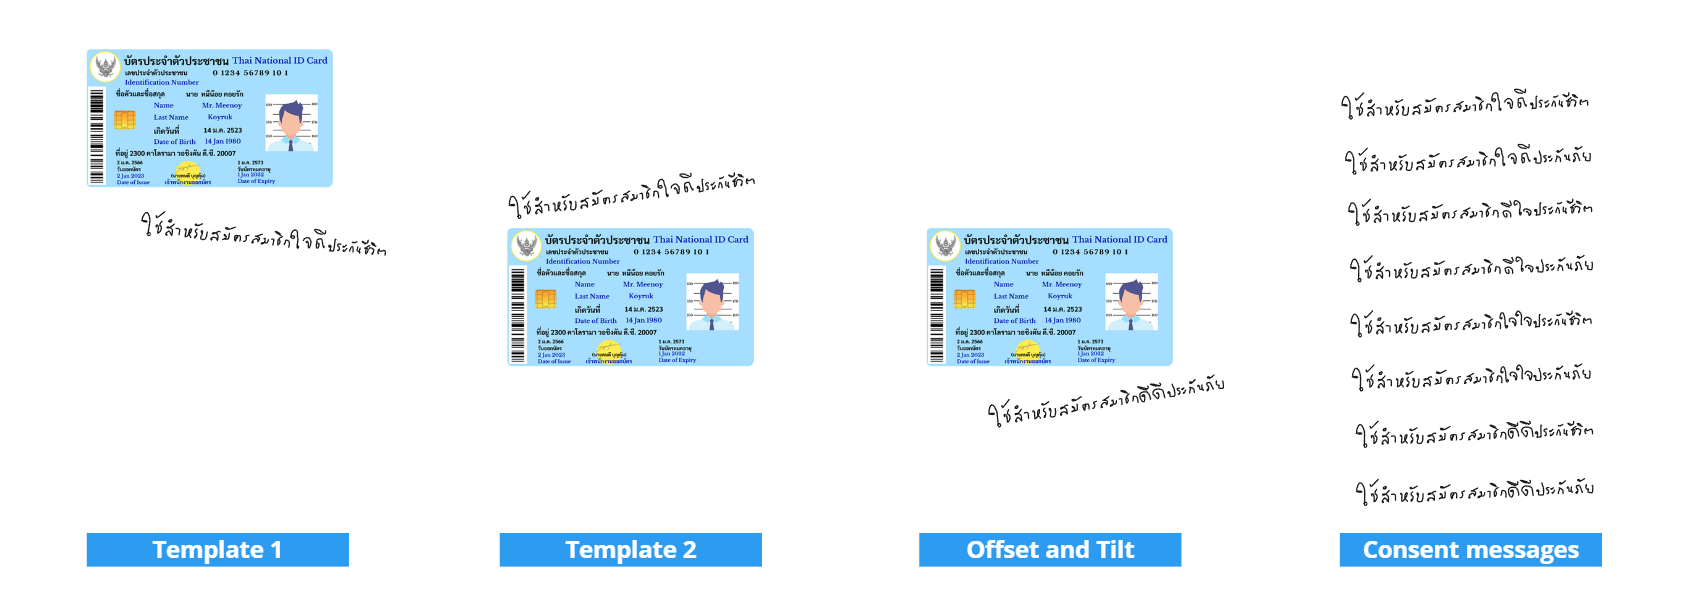

# Data Preprocessing  

One advantage of using a synthetic dataset is that it eliminates the need for extensive preprocessing. Unlike real-world datasets, synthetic images are already clean and standardized, with consistent resolution and quality.

In contrast, real datasets often require preprocessing steps such as resizing, binarization, denoising, and brightness/contrast adjustments to account for imperfections like noise, uneven lighting, or varying image quality. However, since the synthetic dataset is free from these issues, no preprocessing is necessary, allowing us to focus directly on model development.  

# Object Detection with YOLO

Computer vision encompasses a wide range of applications, one of which is object detection. Object detection identifies objects of interest in images or videos and provides their labels, confidence scores, and bounding boxes. These capabilities align perfectly with the objective of detecting consent messages in documents.

## Object Detection Models
Object detection models are generally categorized into two types:

- **Two-Stage Models**: These models, like Fast R-CNN, perform object detection in two steps—first locating bounding boxes and then predicting the labels.
- **One-Stage Models**: These models, like YOLO (You Only Look Once), combine the tasks of bounding box prediction and label classification into a single step, improving speed.

## YOLO: An Overview
YOLO is a one-stage object detection model designed for real-time tasks. Initially, YOLO used AlexNet as its base model, with custom layers added to create its architecture. Its unique approach involves dividing the image into a grid and performing predictions for each grid cell, including bounding boxes, confidence scores, and class probabilities.

## YOLO Loss
The YOLO loss function comprises three components:

- **Localization Loss**: Measures the accuracy of bounding box predictions.
- **Confidence Loss**: Evaluates the confidence score of the detected object.
- **Classification Loss**: Assesses the accuracy of object class predictions.

## Benefits and Trade-offs
The primary advantage of YOLO is its speed, making it ideal for real-time object detection and tracking. However, this speed comes with a trade-off in accuracy, as YOLO may underperform compared to some two-stage models in certain scenarios.

## Relevance to Consent Detection
The efficiency and capabilities of YOLO make it well-suited for the consent message detection task, where the objective is to quickly and accurately locate and label consent messages in documents. This unique match between YOLO's strengths and the project’s goals underscores its selection as the model for this work.

## YOLO Training Explaination

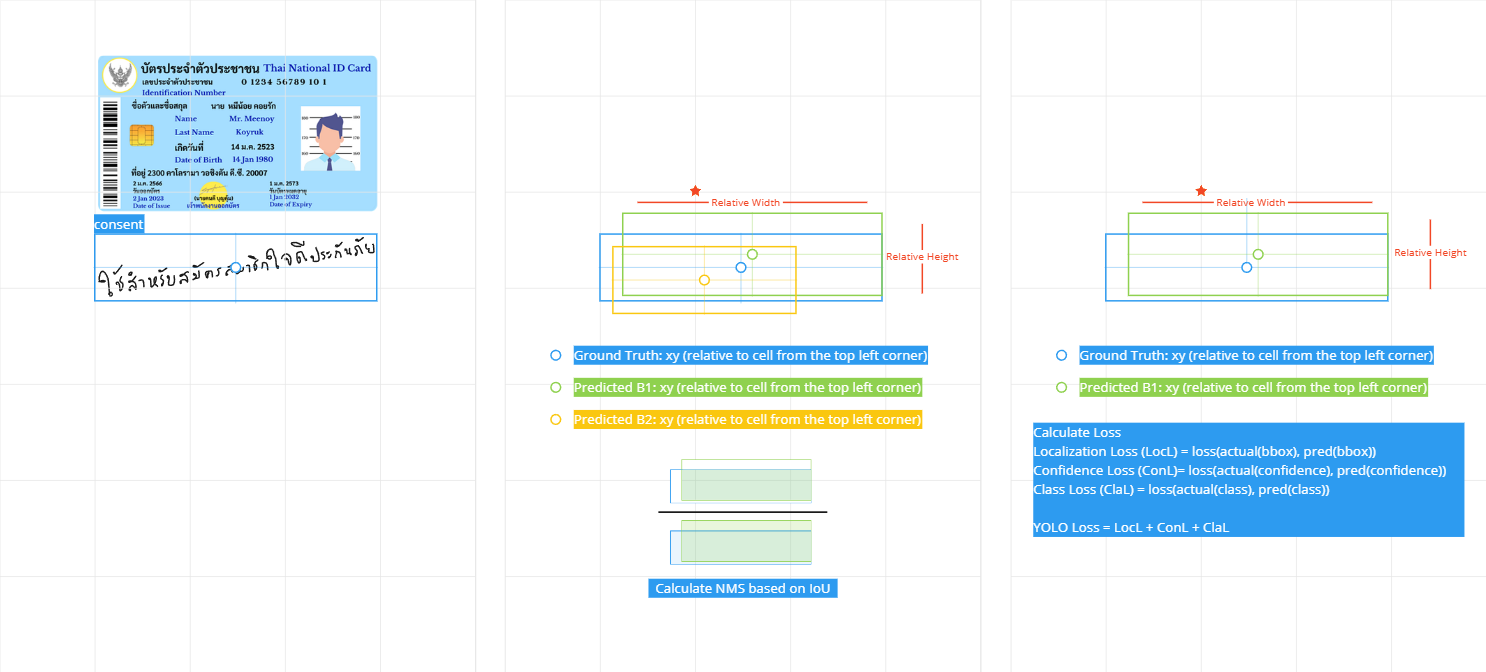

# Methodology/Approach  

This project uses the YOLOv11 object detection model to detect consent messages in synthetic documents. The key steps and configurations are outlined below:

## Dataset Preparation  

The synthetic dataset includes bounding box annotations created with Label Studio. The data is split into three subsets:

- Training Set: 171 images.  
- Validation Set: 43 images.  
- Test Set: 22 images (used for demonstration purposes).  

## Evaluation Metrics

Model performance is evaluated using the following metrics:  

- **Loss**: Measures model optimization during training.  
- **Confusion Matrix**: Provides insights into classification accuracy.  
- **Mean Average Precision (mAP)**: Assesses object detection precision and recall.   

## Experimental Setup

Three experiments were conducted to assess model performance:  

- **Experiment 1**: Trained for 1 epoch with original image size (642x908).  
- **Experiment 2**: Trained for 10 epoch with original image size
- **Experiment 3**: Trained for 100 epochs with the original image size.  
- **Experiment 4**: Trained for 1 epochs with images resized to 640x640.  
- **Experiment 5**: Trained for 10 epochs with images resized to 640x640.  
- **Experiment 6**: Trained for 100 epochs with images resized to 640x640.  
- **Experiment 7**: Trained for 1 epochs with images resized to 320x320.  
- **Experiment 8**: Trained for 10 epochs with images resized to 320x320.  
- **Experiment 9**: Trained for 100 epochs with images resized to 320x320.  

## Data Augmentation and Preprocessing  
Data augmentation is handled automatically by the YOLOv11 framework, which includes operations such as resizing, horizontal flipping, translation, and brightness/contrast adjustments. These built-in preprocessing techniques eliminate the need for additional manual preprocessing, streamlining the workflow and ensuring the data is optimized for object detection tasks.

This methodology ensures a systematic approach to training and evaluating the model while leveraging YOLOv11's robust preprocessing and augmentation capabilities.

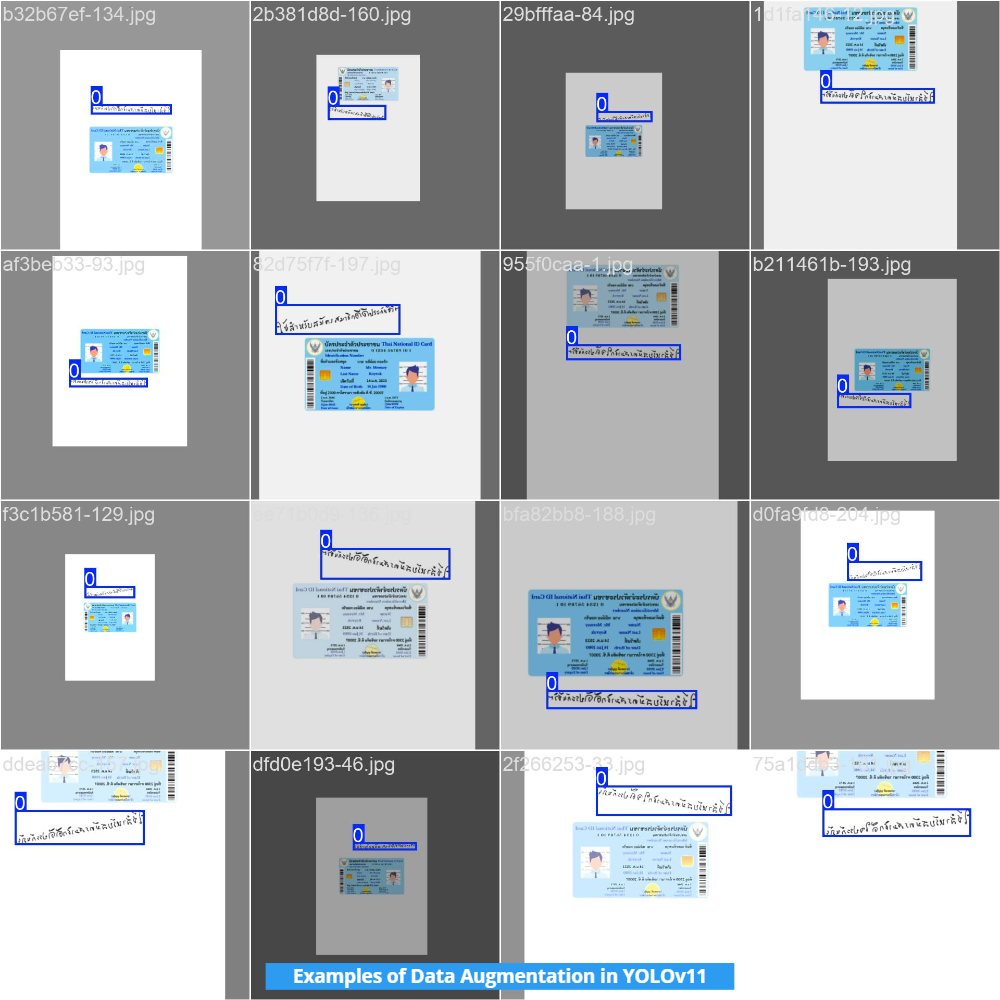

# Experiment Results

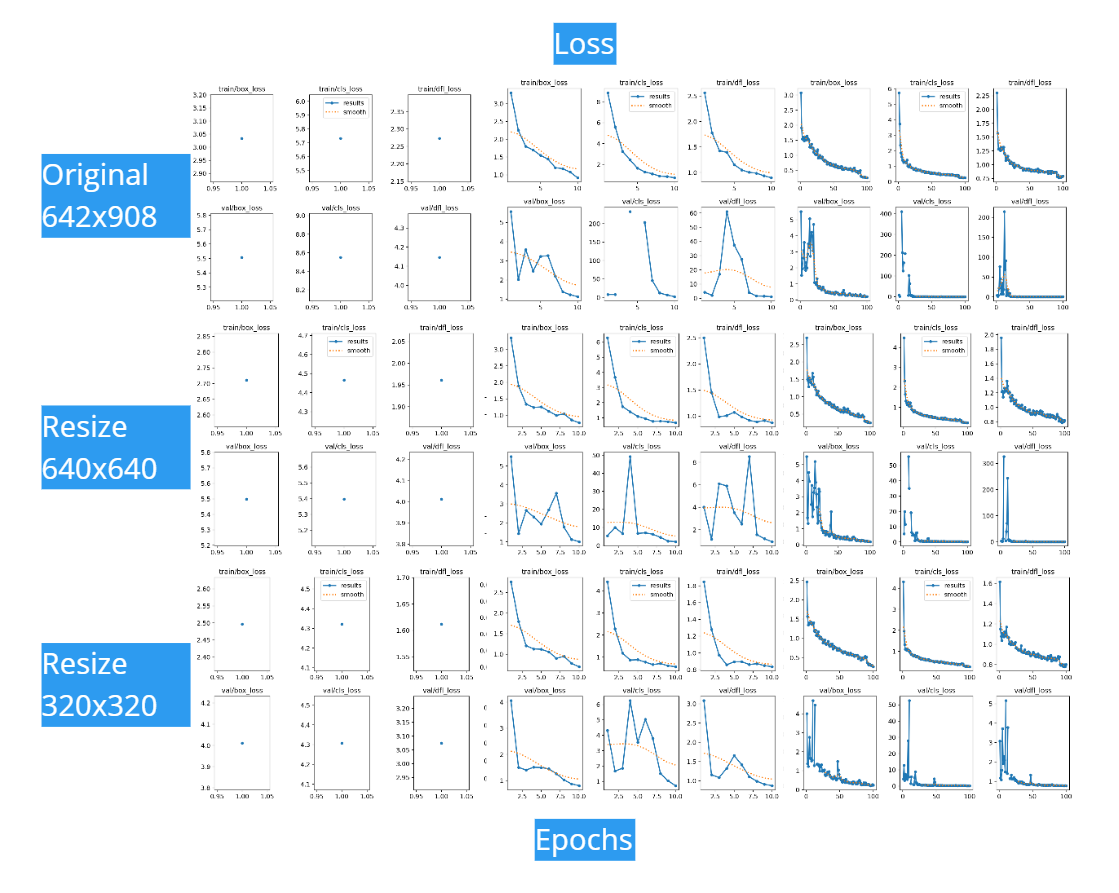

## Loss 
The experiments provided valuable insights into the performance of the YOLOv11 model with varying training durations and image sizes. 

### 1 Epoch Training
Training the model for just 1 epoch did not yield meaningful results, regardless of the image size. The loss metrics for both training and validation remained high, indicating insufficient learning.

### 10 Epochs Training
When trained for 10 epochs with resized images (320x320), the model showed a significant and rapid decrease in loss across key metrics:

- **Bounding Box Loss**: Improved localization accuracy.
- **Class Loss**: Enhanced classification confidence.
- **DFL (Distribution Focal Loss)**: Better precision in bounding box regression.  

The results demonstrate that resizing to 320x320 helps the model converge faster and more effectively during early training.

### 100 Epochs Training
Extending the training to 100 epochs with resized images (320x320) produced similar improvements as seen in the 10-epoch experiment. This suggests that resizing to 320x320 allows the model to achieve optimal performance efficiently without the need for prolonged training.

These findings highlight that resizing images to 320x320 strikes a balance between computational efficiency and model performance, making it a practical choice for this task.

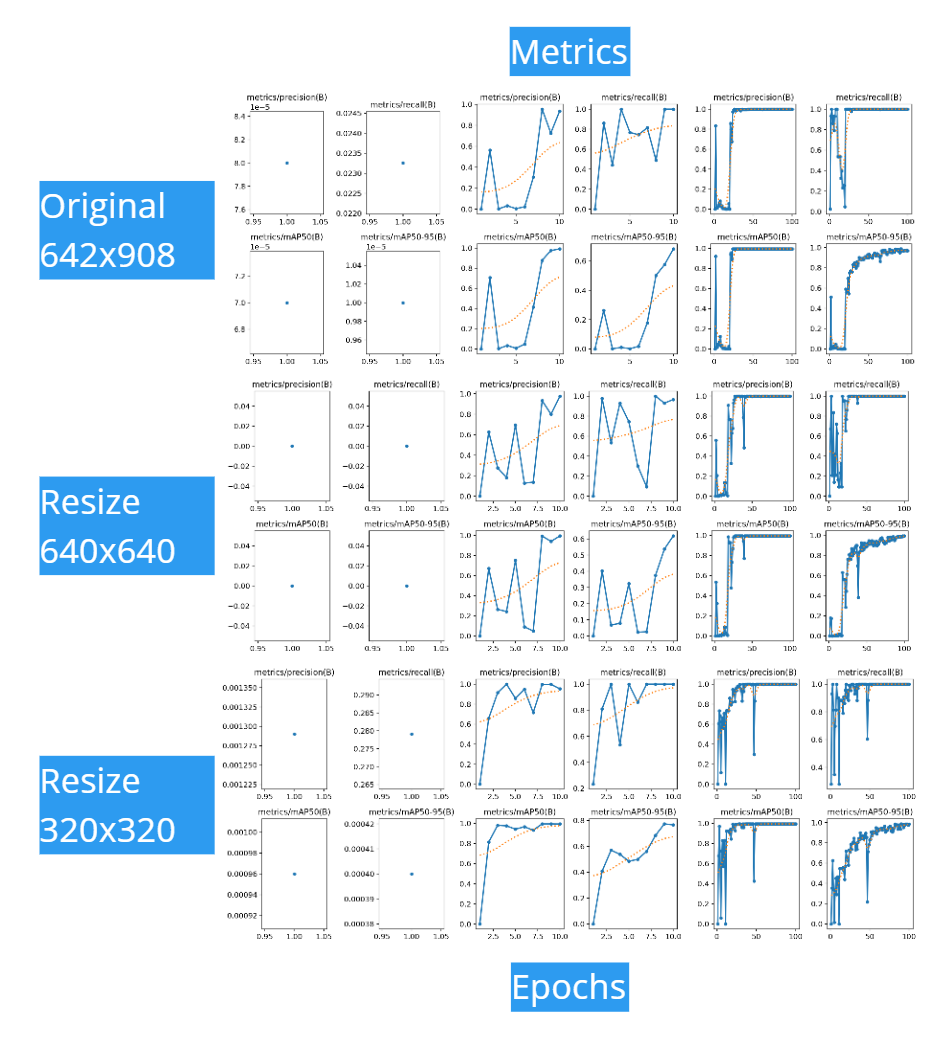

## Performance Metrics: Precision, Recall, mAP50 and mAP50-95


The experiments revealed the following trends in precision, recall, and mean Average Precision (mAP) metrics at different training durations and image sizes:

### 10 Epochs Training

Resizing to 320x320 showed faster improvements across all metrics:
- Precision: Increased detection accuracy for positive predictions.  
- Recall: Improved detection of all relevant consent messages.  
- mAP50: Better overlap between predicted and ground truth bounding boxes at a 50% Intersection over Union (IoU) threshold.  
- mAP50-95: Consistent improvements across multiple IoU thresholds.  

This indicates that resizing to 320x320 allows for efficient learning in a shorter training period.


### 100 Epochs Training

Both 320x320 and 640x640 resolutions showed some fluctuations in metrics around the 50th epoch, suggesting intermediate instability during training.
By the end of 100 epochs, all configurations—original size, 640x640, and 320x320—achieved nearly identical performance across precision, recall, mAP50, and mAP50-95.


### Key Takeaway
Resizing to 320x320 provides faster convergence during early training while ultimately matching the performance of higher resolutions in extended training. This makes it an efficient choice for achieving comparable results with reduced computational demands.

# Discussion/Conclusion  

Resizing images plays a crucial role in improving the performance and speed of consent detection. Training with the original image size took about 8 hours for 100 epochs, while resizing to 640x640 reduced the time to 3 hours and 320x320 took less than an hour. This significant time reduction makes resizing an effective way to optimize both performance and computational efficiency.

Another important factor is the number of training epochs. Although more epochs typically improve performance, early stopping can be beneficial. The results show that significant performance gains were achieved in the first few epochs, especially with resized images, suggesting that completing all 100 epochs may not be necessary.

In conclusion, resizing to 320x320 is the most efficient choice, balancing speed and performance, while early stopping further optimizes the training process.

# Reference  

**Introduction**  
- [FBI Insurance Fraud](https://www.fbi.gov/stats-services/publications/insurance-fraud)  

**YOLO section**
- [Concept of YOLOv1:The Evolution of Real-Time Object Detection](https://medium.com/@sachinsoni600517/concept-of-yolov1-the-evolution-of-real-time-object-detection-d773770ef773)  
- [Yolo V1 (Pascal VOC) | Simplistic Pytorch Implementation from scratch](https://medium.com/@saptarshimt/yolo-v1-pascal-voc-simplistic-pytorch-implementation-from-scratch-961fa36f4d4d)